In [32]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [33]:
titanic = pd.read_csv('dataset/tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
print("Titanic Data Size  :" ,titanic.size)
print("Titanic Data Shape :" ,titanic.shape)

Titanic Data Size  : 5016
Titanic Data Shape : (418, 12)


In [35]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


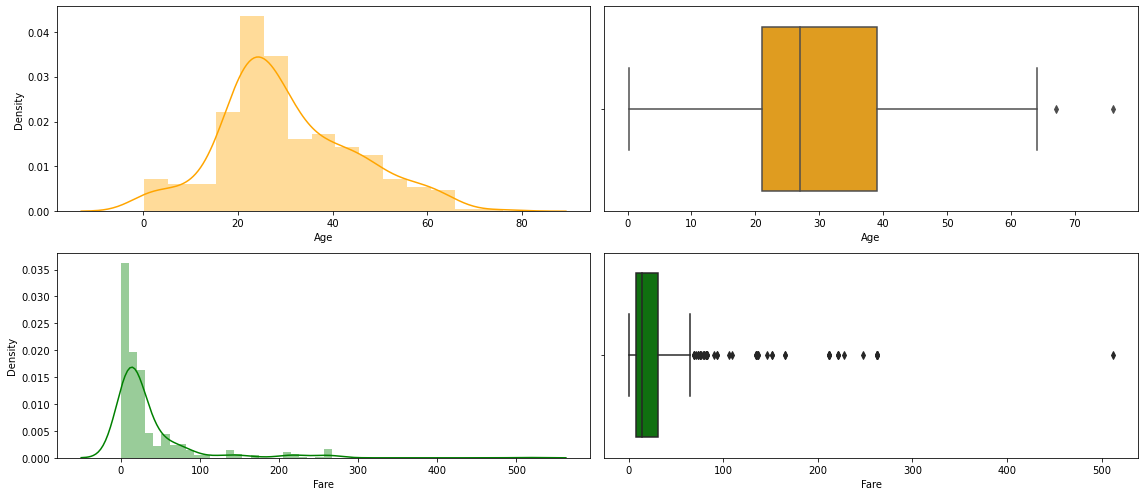

In [36]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(titanic['Age'],color='orange')
plt.subplot(2,2,2)
sns.boxplot(titanic['Age'],color='orange')

plt.subplot(2,2,3)
sns.distplot(titanic['Fare'],color='Green')
plt.subplot(2,2,4)
sns.boxplot(titanic['Fare'],color='Green')

plt.tight_layout()
plt.show()

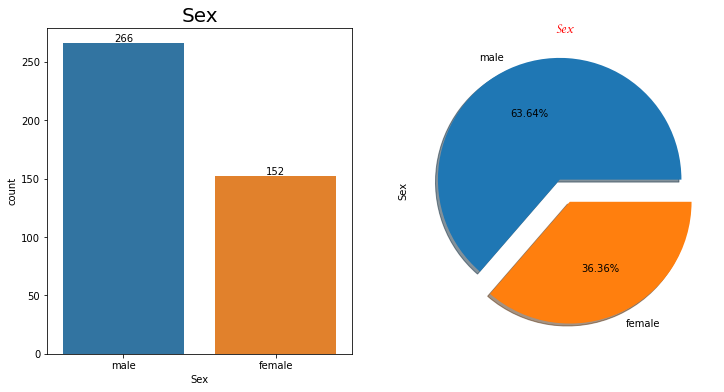

In [37]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)
ax =plt.subplot(1,2,2)
ax=titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

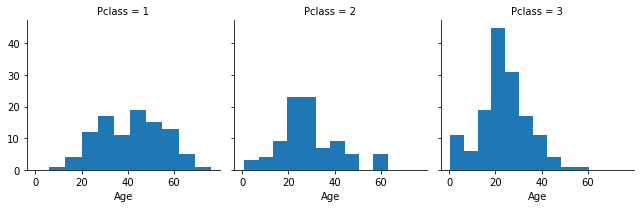

In [38]:
g = sns.FacetGrid(titanic, col="Pclass")
g = g.map(plt.hist, "Age")

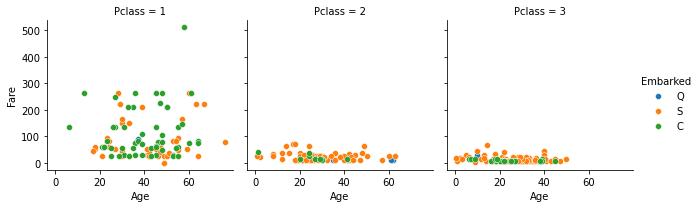

In [39]:
g = sns.FacetGrid(titanic, col="Pclass", hue="Embarked")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.add_legend()
plt.show()

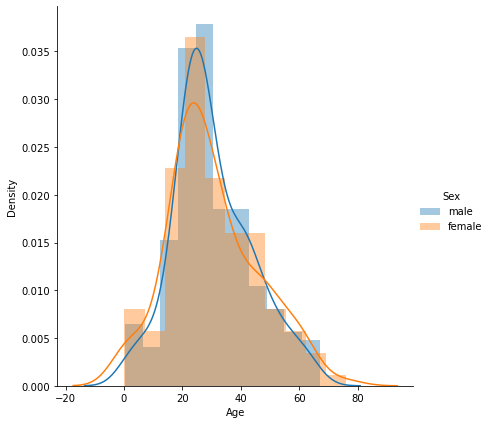

In [40]:
sns.FacetGrid(titanic, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

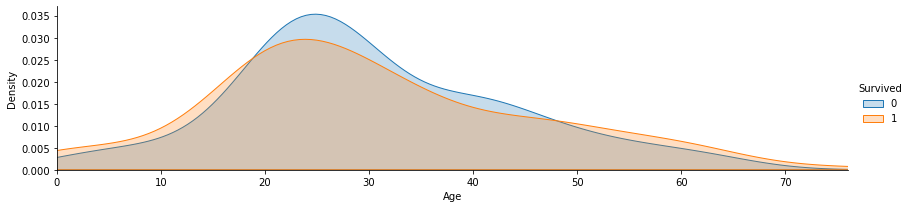

In [41]:

fig = sns.FacetGrid(titanic, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

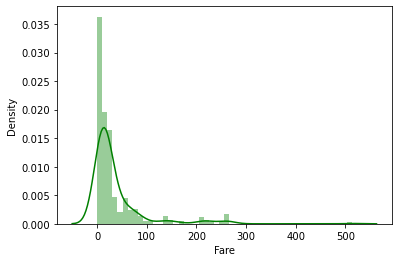

In [42]:
sns.distplot(titanic['Fare'],color="g")
plt.show()

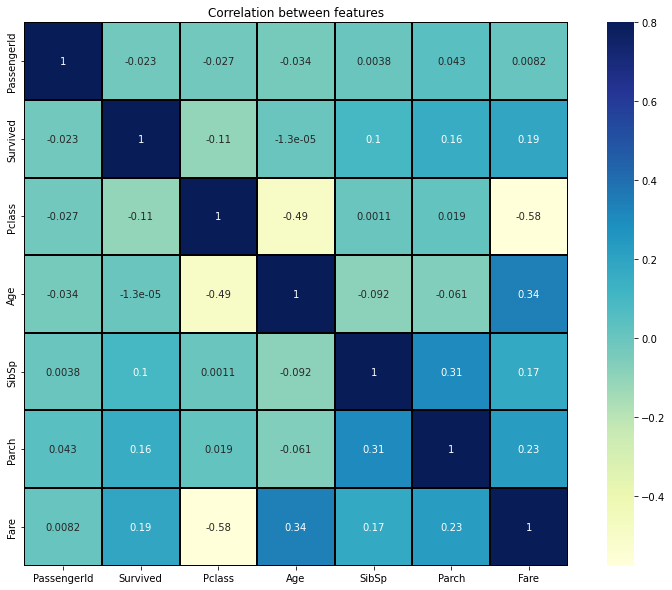

In [43]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [44]:
titanic.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [45]:
def find_missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [46]:
find_missing(titanic)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


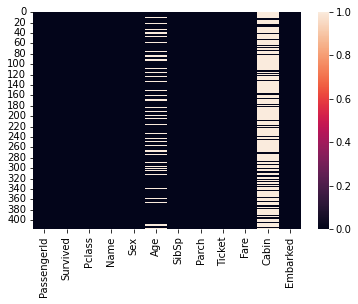

In [47]:
sns.heatmap(titanic.isnull());

In [48]:
# Filled the missing value in Age column with the mean value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

# Filled the missing value in Fare columns with mean Value
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')

In [49]:
# Drop the columns 
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S


In [50]:
!pip install missingno


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


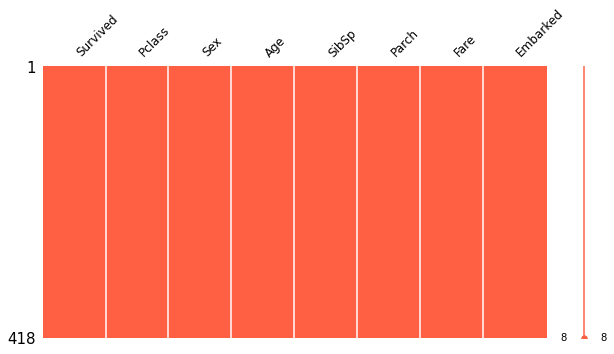

In [51]:
import missingno
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

In [52]:
!pip install category_encoders


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


In [54]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = titanic['Survived']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [57]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00,0,2,83.1583,3
201,1,1,0.33,0,2,14.4000,2
336,2,1,32.00,0,0,13.0000,2
187,1,1,17.00,2,0,8.0500,2
214,1,2,38.00,4,2,7.7750,2


In [58]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, confusion_matrix, classification_report

In [64]:
# using logistic regressio
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[76  0]
 [ 0 50]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

